In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Recall
import seaborn as sns

In [ ]:
# Loading the dataset using pandas
url = 'https://swmukher.web.cern.ch/swmukher/dataset_star.csv'
data = pd.read_csv(url)

In [ ]:
# Q.1 How many training examples are available in the dataset?

print(f"Total examples in the dataset: {data.shape[0]}")

# Total training examples : 240

Total examples in the dataset: 240


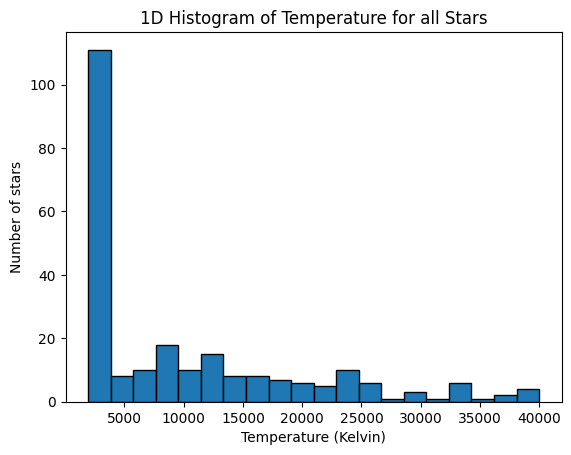

In [ ]:
# Q.2 Draw a 1D histogram of temperature for all stars.

plt.figure()
plt.hist(data['Temperature'], bins=20, edgecolor='black')
plt.title("1D Histogram of Temperature for all Stars")
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Number of stars")
plt.show()

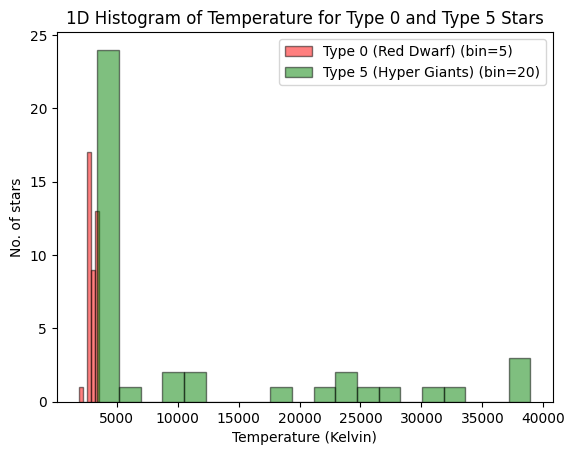

In [ ]:
# Q.3 Draw 1D histograms of temperature for type 0 stars and type 5 stars on the same canvas.

plt.figure()
plt.hist(data[data['Type'] == 0]['Temperature'], bins=5, color='red', alpha=0.5, label='Type 0 (Red Dwarf) (bin=5)', edgecolor='black')
plt.hist(data[data['Type'] == 5]['Temperature'], bins=20, color='green', alpha=0.5, label='Type 5 (Hyper Giants) (bin=20)', edgecolor='black')
plt.title("1D Histogram of Temperature for Type 0 and Type 5 Stars")
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("No. of stars")
plt.legend()
plt.show()

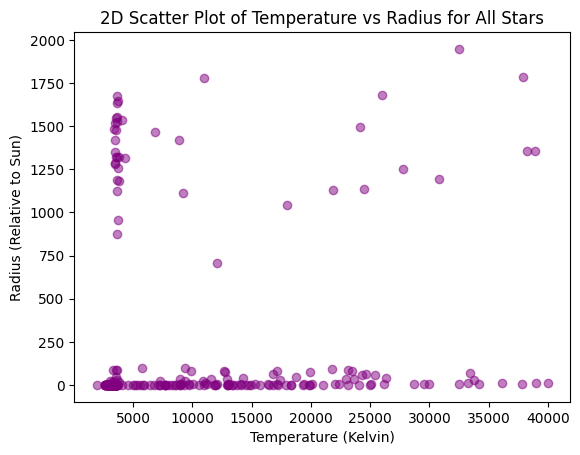

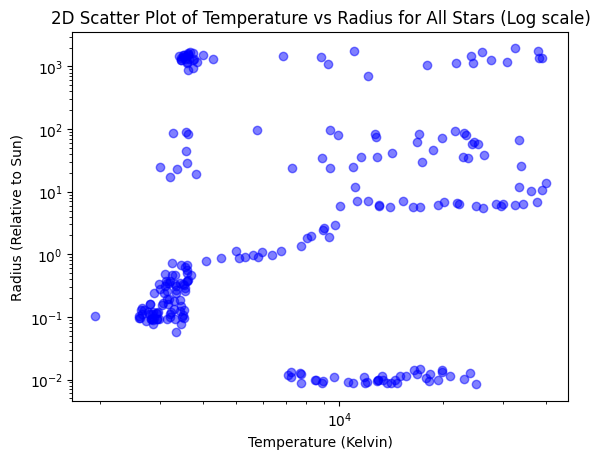

In [ ]:
# Q.4 Draw a 2D scatter plot of temperature (X-axis) vs R (Y-axis) for all stars.

plt.figure()
plt.scatter(data['Temperature'], data['R'], color='purple', alpha=0.5)

plt.title("2D Scatter Plot of Temperature vs Radius for All Stars")
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Radius (Relative to Sun)")
plt.show()

print(" ")

plt.scatter(data['Temperature'], data['R'], color='blue', alpha=0.5)
#better representation when done in logarithmic scale
plt.xscale('log')
plt.yscale('log')

plt.title("2D Scatter Plot of Temperature vs Radius for All Stars (Log scale)")
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Radius (Relative to Sun)")
plt.show()

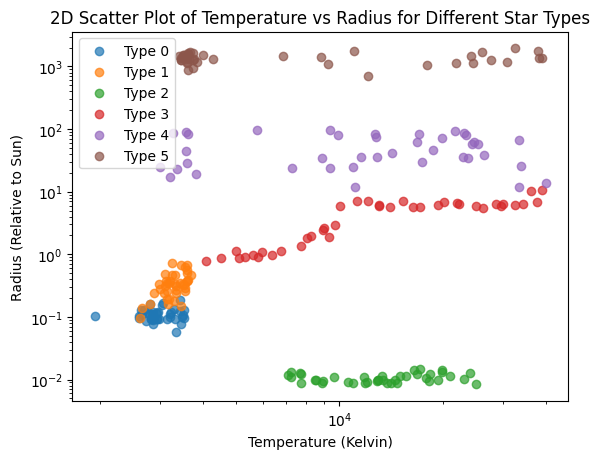

In [ ]:
# Q.5 Draw 2D scatter plots of temperature vs R for each type of star on the same canvas.

plt.figure()
colors = ['red', 'brown', 'gray', 'blue', 'orange', 'green']
for star_type in range(6):
    subset = data[data['Type'] == star_type] #selects only the rows in the dataset which match the type in variable star_type
    plt.scatter(subset['Temperature'], subset['R'], label=f'Type {star_type}', alpha=0.7)

plt.xscale('log')
plt.yscale('log')
plt.title("2D Scatter Plot of Temperature vs Radius for Different Star Types")
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Radius (Relative to Sun)")
plt.legend()
plt.show()

In [ ]:
# Q.6 Transforming non-numerical features (Color, Spectral_Class) to numerical features
# Using LabelEncoder (sklearn) to map unique non-numerical labels into unique numerical labels (0,1,2,..)

color = LabelEncoder()
spectral = LabelEncoder()
data['Color'] = color.fit_transform(data['Color'])
data['Spectral_Class'] = spectral.fit_transform(data['Spectral_Class'])

# Check the mapping for 'Color'

color_mapping = dict(zip(color.classes_, color.transform(color.classes_)))
print("Color mapping:", color_mapping)

# Check the mapping for 'Spectral_Class'

spectral_mapping = dict(zip(spectral.classes_, spectral.transform(spectral.classes_)))
print("Spectral_Class mapping:", spectral_mapping)

Color mapping: {'Blue': 0, 'Blue White': 1, 'Blue white': 2, 'Blue-White': 3, 'Blue-white': 4, 'Orange': 5, 'Orange-Red': 6, 'Pale yellow orange': 7, 'Red': 8, 'White': 9, 'White-Yellow': 10, 'Whitish': 11, 'Yellowish': 12, 'Yellowish White': 13, 'white': 14, 'yellow-white': 15, 'yellowish': 16}
Spectral_Class mapping: {'A': 0, 'B': 1, 'F': 2, 'G': 3, 'K': 4, 'M': 5, 'O': 6}


In [ ]:
# Q.7 Use about 80% data for training and the rest of the data for testing.

X = data.drop('Type', axis=1)
y = to_categorical(data['Type'], num_classes=6) #Creates one-hot arrays for analysis of each class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Q.8 Write a fully-connected neural network using Keras. The neural net should have at least one hidden layer. Use your own judgement about hyperparameters.

from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Add the input layer using Input(shape)
model.add(Input(shape=(X_train.shape[1],)))  # X_train.shape[1] is the number of features

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(6, activation='softmax'))  # 6 output classes and last layer activation is softmax

# Thus we use 2 hidden layers of 64 and 32 units each and lastly an output layer
opt = Adam(learning_rate=0.001)

#Compiling the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', 'Recall'])

In [ ]:
# Q.9 How many parameters (w and b) in total do you have in your model?

print(model.summary())

# Hence we can see we have 2726 parameters including both w and b.
# In particular we have 2624 w's and  102 b's

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,726 (10.65 KB)

 Trainable params: 2,726 (10.65 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Q.10 Performing training process

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=80)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 639ms/step - Recall: 0.1484 - accuracy: 0.1484 - loss: 51293.2734 - val_Recall: 0.1875 - val_accuracy: 0.1875 - val_loss: 23447.4160
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - Recall: 0.1490 - accuracy: 0.1490 - loss: 41701.4062 - val_Recall: 0.2708 - val_accuracy: 0.2708 - val_loss: 18696.5352
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - Recall: 0.1573 - accuracy: 0.1573 - loss: 32102.8691 - val_Recall: 0.2500 - val_accuracy: 0.2500 - val_loss: 14392.8594
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - Recall: 0.1854 - accuracy: 0.1854 - loss: 24141.1738 - val_Recall: 0.2500 - val_accuracy: 0.2500 - val_loss: 10361.1709
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - Recall: 0.1823 - accuracy: 0.1823 - loss: 18293.4805 - val_Recall: 0.2292 - val_accuracy: 0.2292 - val_loss: 6376.2485
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - Recall: 0.1807 - accuracy: 0.1807 - loss: 11437.1777 - val_Recall: 0.3542 - val_accuracy

In [ ]:
# Q.11 Predict on test data

count=0

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) #contains indices of maximum probability values for each predicted output layer vector of 6 classes
y_test_classes = np.argmax(y_test, axis=1) # from test one_hot vectors

for i in range(len(y_pred_classes)):
  if y_pred_classes[i] == y_test_classes[i]:
      count+=1

print(f"Prediction Accuracy: {count/len(y_pred_classes)}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction Accuracy: 0.8958333333333334


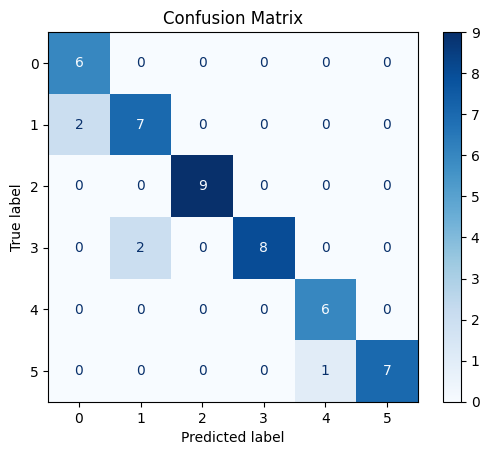

In [ ]:
# Q.12 Plot the confusion matrix, based on test data, for multi-class classification.

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Create and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5])
fig, ax = plt.subplots()
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Q.13 What is the overall accuracy of the model?

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

Overall Accuracy: 89.58%


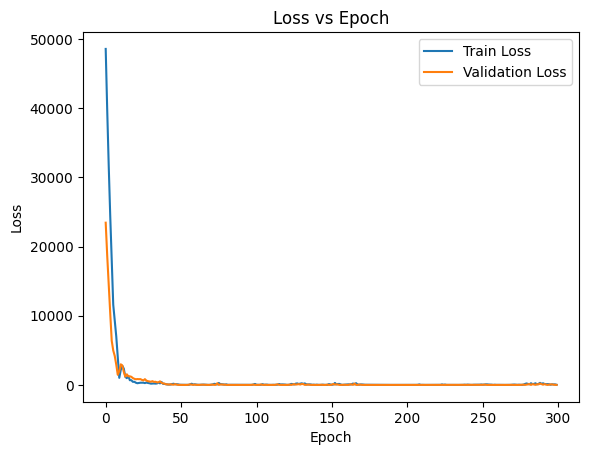

In [ ]:
# Q.14 Plot loss vs epoch

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

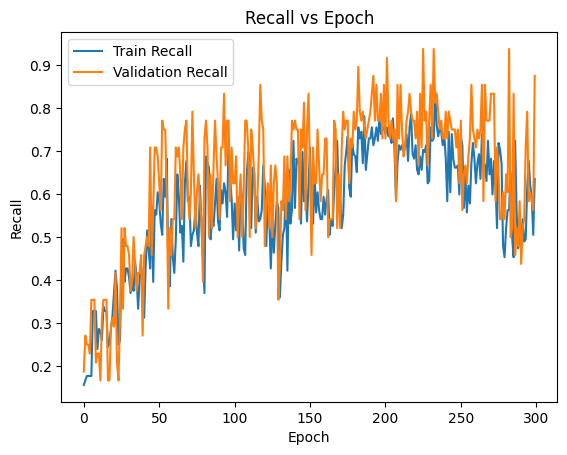

In [ ]:
# Q.15 Plot recall vs epoch

plt.figure()
plt.plot(history.history['Recall'], label='Train Recall')
plt.plot(history.history['val_Recall'], label='Validation Recall')
plt.title("Recall vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.legend()
plt.show()